In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# with SNN_JHK_v1_230308.py
import numpy as np
import time
import matplotlib.pyplot as plt
from SNN_JHK_v1_230308 import *
import scipy.io

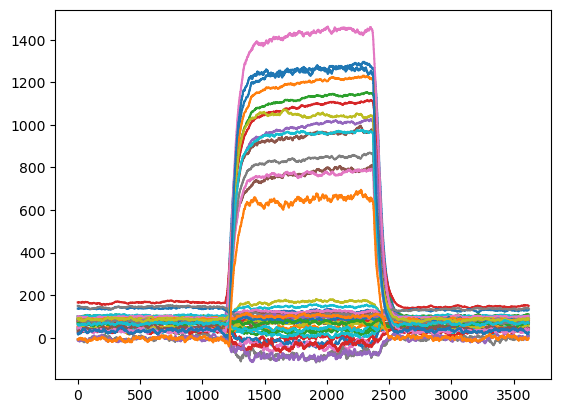

In [2]:
mat = scipy.io.loadmat('DATA/InputSpike_4class.mat')

input = mat['input']
inputTime = mat['inputTime']

plt.plot(inputTime, input[0][42])

In [3]:
for i in range(len(input[0])):
    print(i)
    print(input[0][i].shape)

0
(3620, 42)
1
(3620, 42)
2
(3620, 42)
3
(3620, 42)
4
(3620, 42)
5
(3620, 42)
6
(3620, 42)
7
(3620, 42)
8
(3620, 42)
9
(3620, 42)
10
(3620, 42)
11
(3620, 42)
12
(3620, 42)
13
(3620, 42)
14
(3620, 42)
15
(3620, 42)
16
(3620, 42)
17
(3620, 42)
18
(3620, 42)
19
(3620, 42)
20
(3620, 42)
21
(3620, 42)
22
(3620, 42)
23
(3620, 42)
24
(3620, 42)
25
(3620, 42)
26
(3620, 42)
27
(3620, 42)
28
(3620, 42)
29
(3620, 42)
30
(3620, 42)
31
(3620, 42)
32
(3620, 42)
33
(3620, 42)
34
(3620, 42)
35
(3620, 42)
36
(3620, 42)
37
(3620, 42)
38
(3620, 42)
39
(3620, 42)
40
(3620, 42)
41
(3620, 42)
42
(3620, 42)
43
(3620, 42)
44
(3620, 42)
45
(3620, 42)
46
(3620, 42)
47
(3620, 42)
48
(3620, 42)
49
(3620, 42)
50
(3620, 42)
51
(3620, 42)


In [4]:
ncols, nrows = 7, 3

receptiveField = [np.array([[0.05]])]
rf = createReceptiveField(receptiveField,2,ncols,nrows)

print(rf.shape)

weights = Synapse(rf)


Complete! Create 1x1 kernel! with 42 times.
(42, 42)


In [5]:
L1_num_neurons = ncols * nrows * 2

input_layer = IzhikevichLayer(0.02, 0.2, -65, 8, L1_num_neurons)

signal_length = inputTime[-1][0]
print(signal_length)


layer initialized
3620


(3620, 42)


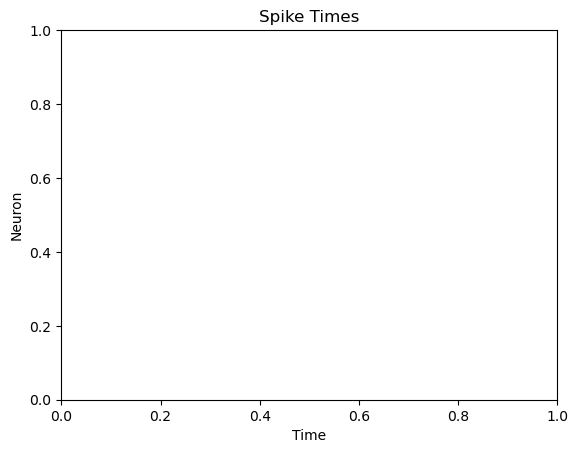

[]
0.21500086784362793


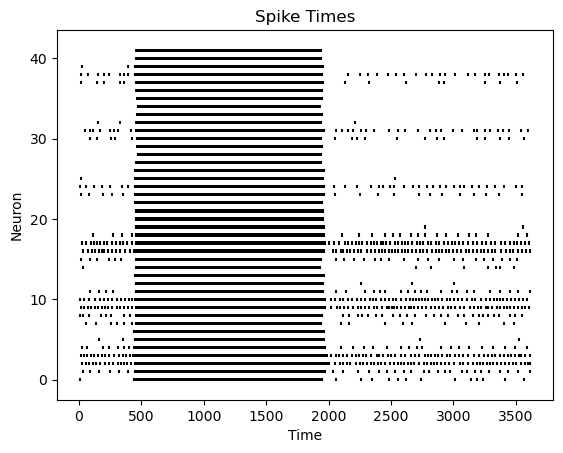

[11, 439, 449, 457, 464, 471, 477, 483, 489, 495, 501, 507, 513, 519, 524, 529, 534, 539, 544, 549, 554, 559, 564, 569, 573, 577, 581, 585, 589, 593, 597, 601, 605, 609, 613, 617, 621, 625, 629, 633, 637, 641, 645, 649, 653, 657, 661, 665, 669, 673, 677, 681, 685, 689, 693, 697, 701, 705, 709, 713, 717, 721, 725, 729, 733, 737, 741, 745, 749, 753, 757, 761, 765, 769, 773, 777, 781, 785, 789, 793, 797, 801, 805, 809, 813, 817, 821, 825, 829, 833, 837, 841, 845, 849, 853, 857, 861, 865, 869, 873, 877, 881, 885, 889, 893, 897, 901, 905, 909, 913, 917, 921, 925, 929, 933, 937, 940, 943, 946, 949, 952, 955, 958, 961, 964, 967, 970, 973, 976, 979, 982, 985, 988, 991, 994, 997, 1000, 1003, 1006, 1009, 1012, 1015, 1018, 1021, 1024, 1027, 1030, 1033, 1036, 1039, 1042, 1045, 1048, 1051, 1054, 1057, 1060, 1063, 1066, 1069, 1072, 1075, 1078, 1081, 1084, 1087, 1090, 1093, 1096, 1099, 1102, 1105, 1108, 1111, 1114, 1117, 1120, 1123, 1126, 1129, 1132, 1135, 1138, 1141, 1144, 1147, 1150, 1153, 1156, 11

In [9]:
# simulation
start_time = time.time()

input_signal = input[0][0]
print(input_signal.shape)

input_layer_spike_times = np.zeros((L1_num_neurons, signal_length))
plot_spike_times(input_layer_spike_times)


for i in range(len(input_signal)):

    I = input_signal[i] * 0.05
    input_layer.update(I)

    post_input = weights.cal_post_input(input_layer.spikes)

    input_layer_spike_times[:, i] = input_layer.spikes


end_time = time.time()


vectorized_time = end_time - start_time

print(vectorized_time)

plot_spike_times(input_layer_spike_times)


